# ML to Predict Home Prieces

### Introduction
USA Real Estate - Predict price¶
About Dataset
This dataset contains Real Estate listings in the US broken by State and zip code.
Data was collected via web scraping using python libraries.

### Goals
- To view and explore data.
- Clean data and remove outliers.
- Create price prediction model on small -to- medium size homes (see home_price_model.pkl for results).
- Extract latitude and longitude information using google services
- Export New Jersey subset for mapping purposes.
- Map New Jersey real estate sites in r shiny environment (see external r shiny project for results).

### The Data
- https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?resource=download
This dataset contains Real Estate listings in the US broken by State and zip code. Data was collected via web scraping using python libraries.

### Columns
- status: Housing Status (on sale or other option)
- price: Price in USD
- bed: Bedroom count
- bath: Bathroom count
- acre_lot: Acre lot
- full_address: Full address
- street: Street name
- city: City name
- state: State name
- zip_code: Zip Code
- house_size: House size in sqft
- sold_date: The date when the house is sold

In [1]:
# working with data
import os
import numpy as np
import pandas as pd
#import geopandas as gpd # the library that lets us read in shapefiles
#import geoplot as gplt # for plotting maps #having trouble getting this to install

# visulizaiton
from termcolor import colored # colored text
import missingno as msno # visuzlise missing data in a matrix
import matplotlib.pyplot as plt

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
# Setting work directory
cwd = os.getcwd()
print("current directory = " + cwd)

# os.chdir("../NotEssentialData")
# print("new directory = " + os.path.abspath(os.curdir))

current directory = C:\Users\ryjam\OneDrive\Documents\Ry Training\Personal Projects\USA-Real-Estate-Dataset


## Data Exploration and Analysis

In [3]:
# Input file - zip

fileInput = "data/realtor-data.zip"
df = pd.read_csv(fileInput, compression='zip').reset_index(drop=True)
print(len(df))
df.head(1)

923159


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [5]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,9.230880e+05,791456.000000,807967.000000,649536.000000,922954.000000,6.253160e+05
mean,8.841225e+05,3.330352,2.488164,17.075888,6590.061523,2.141644e+03
std,2.623745e+06,2.070402,1.940057,962.322866,3818.208203,3.035327e+03
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,2.690000e+05,2.000000,1.000000,0.110000,2919.000000,1.130000e+03
50%,4.750000e+05,3.000000,2.000000,0.290000,7004.000000,1.651000e+03
75%,8.399000e+05,4.000000,3.000000,1.150000,10001.000000,2.499000e+03
max,8.750000e+08,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06


status               0
price               71
bed             131703
bath            115192
acre_lot        273623
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64


<AxesSubplot: >

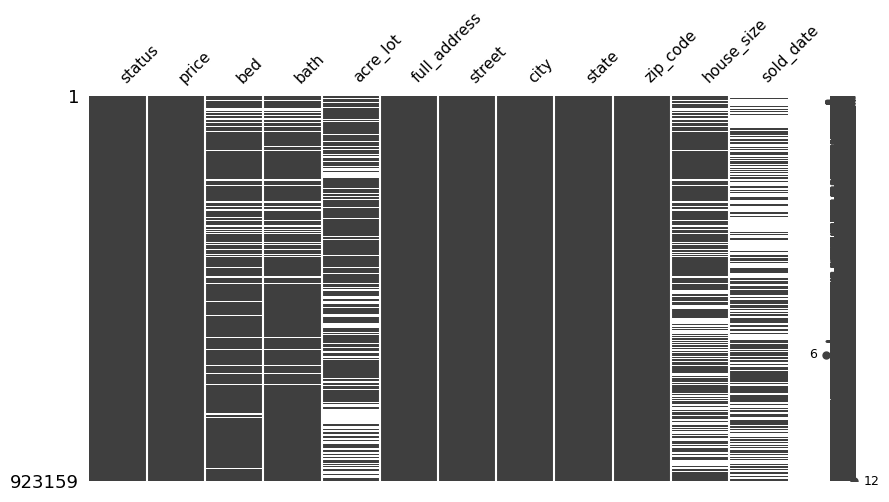

In [6]:
# explore missing values

print(df.isnull().sum())
msno.matrix(df, figsize=(10,5), fontsize=11)

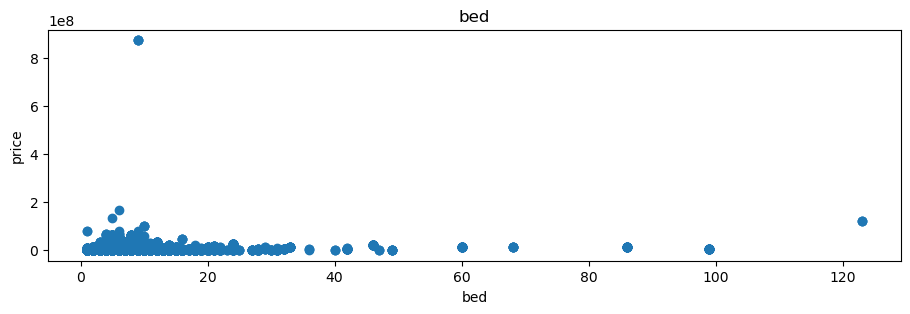

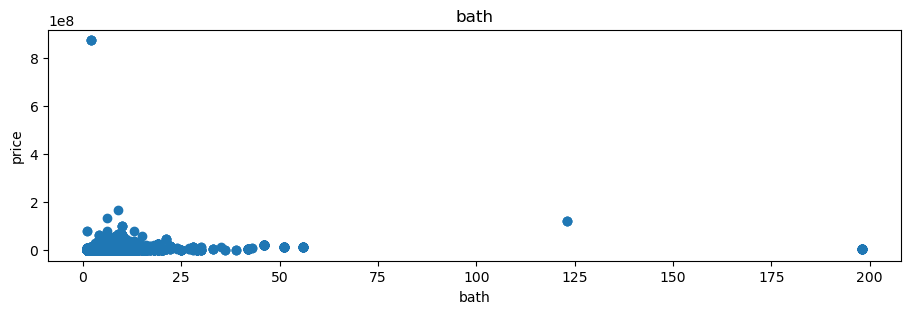

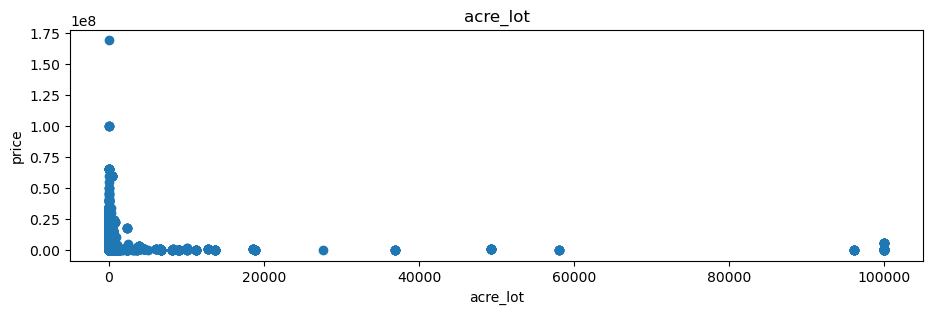

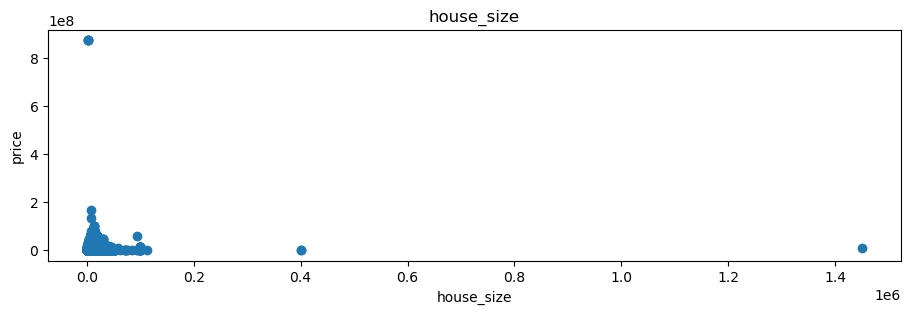

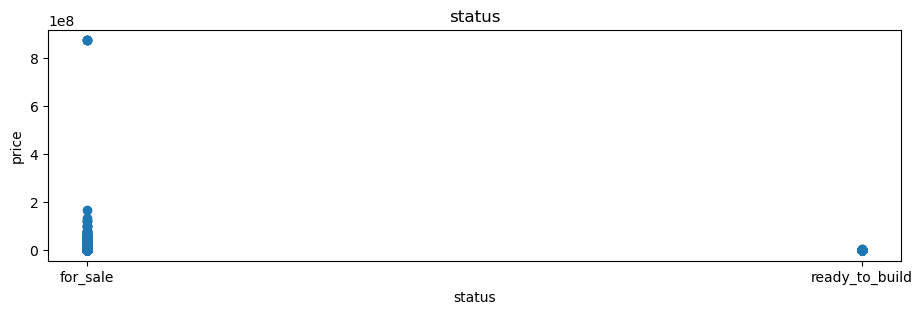

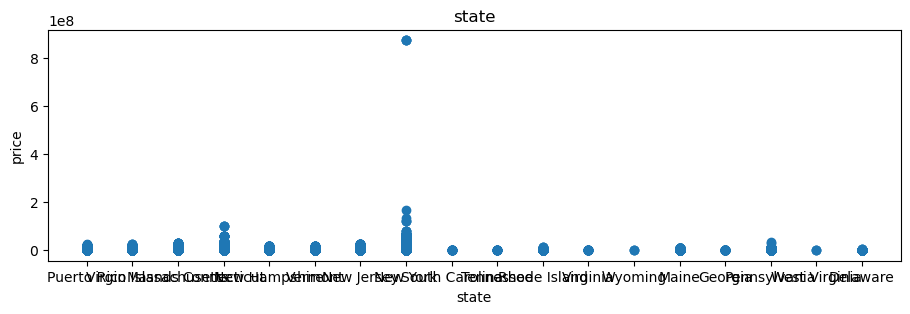

In [7]:
# Plot a scatter plot of price versus features of interest

FeatureList = ['bed', 'bath', 'acre_lot', 'house_size', 'status', 'state']
for col in FeatureList:
    fig = plt.figure(figsize=(11, 3))
    ax = fig.gca()
    plt.scatter(x=df[col], y=df['price'])
    plt.xlabel(col)
    plt.ylabel("price")
    ax.set_title(col)
plt.show()

In [8]:
# function to show the distriubtion of numieric features
def ShowDistributionFuc(var):
    '''
    This function will only works with numierc values.
    Shows statistics & displays a histogram - boxplot combo.
    '''

    # Get statistics
    min_val = var.min()
    mean_val = var.mean()
    med_val = var.median()
    mod_val = var.mode()[0]
    max_val = var.max()
    print(colored('Min: ' + str(min_val), 'grey'))
    print(colored('Mean: ' + str(mean_val), 'cyan'))
    print(colored('Median: ' + str(med_val), 'red'))
    print(colored('Mode: ' + str(mod_val), 'yellow'))
    print(colored('Max: ' + str(max_val), 'grey'))


    # Create a figure for 2 subplots (2 rows, 1 column)(historgram & boxplot)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))
    fig.suptitle('Data Distribution')

    # Plot the histogram, add lines for the mean, median, and mode
    ax[0].hist(var)
    ax[0].set_ylabel('Frequency')
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var, vert=False)
    ax[1].set_xlabel('Value')

    fig.show()

Feature:  price
Min: 0.0
Mean: 884122.5224756469
Median: 475000.0
Mode: 499000.0
Max: 875000000.0


C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


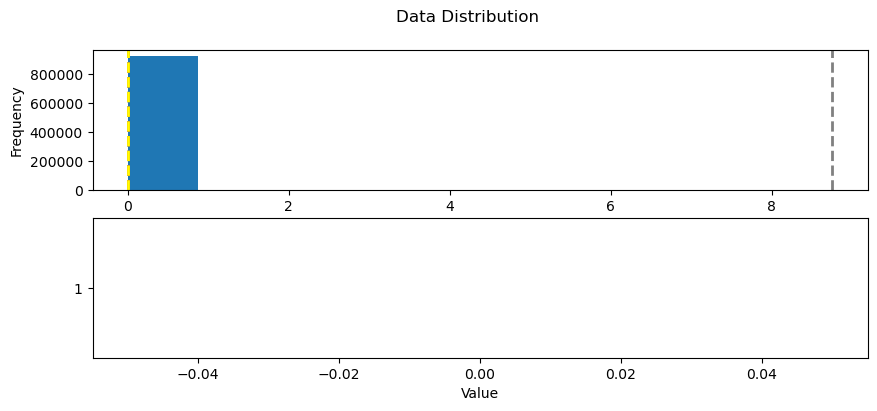

Feature:  bed
Min: 1.0
Mean: 3.3303519083815147
Median: 3.0
Mode: 3.0
Max: 123.0


C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


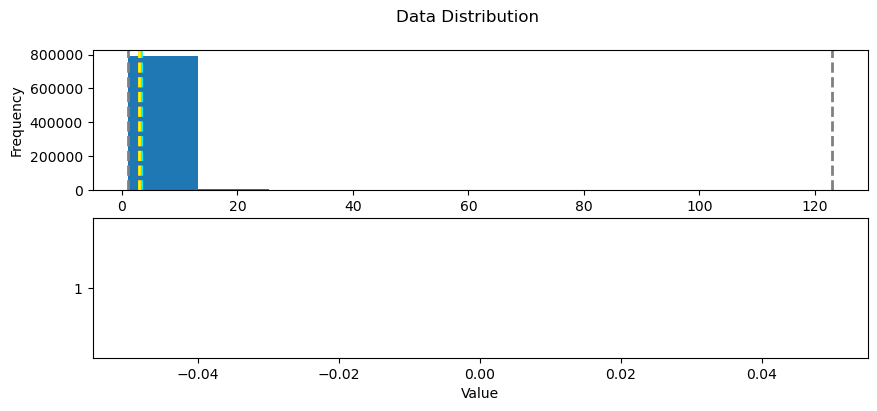

C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Feature:  bath
Min: 1.0
Mean: 2.4881635017271746
Median: 2.0
Mode: 2.0
Max: 198.0


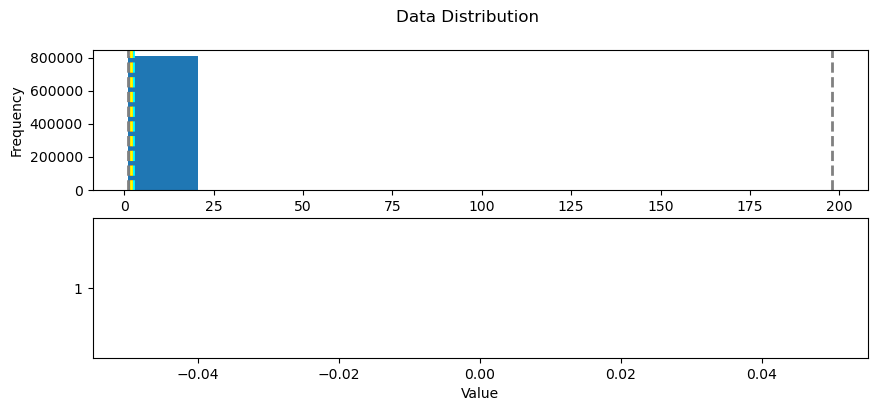

Feature:  acre_lot
Min: 0.0
Mean: 17.07588801852044
Median: 0.29
Mode: 0.06
Max: 100000.0


C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


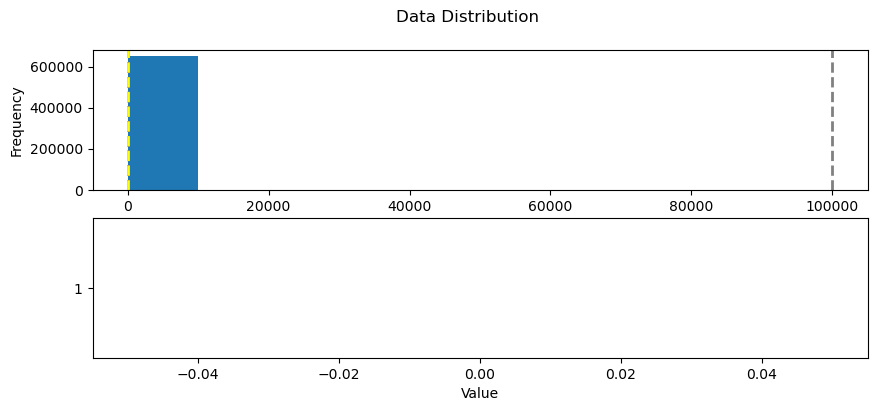

Feature:  house_size
Min: 100.0
Mean: 2141.644071157623
Median: 1651.0
Mode: 1200.0
Max: 1450112.0


C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


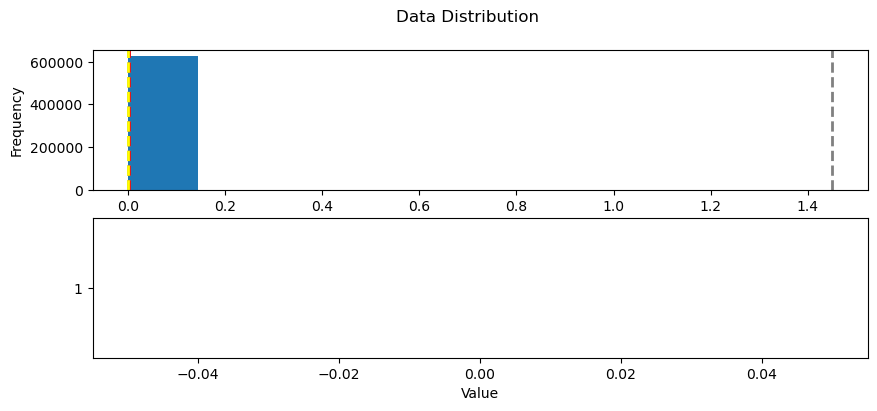

In [9]:
# Show Distribution of some key features of interest

FeatureList = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
for col in FeatureList:
    print(f'Feature: ', col)
    ShowDistributionFuc(df[col])
    plt.show()

## Data Assumptions & Notes
Drawn conclusions after Data Exploration and Analysis

Notes
- Some outlier with a price greater than $800M
- Number of units with high value of beds and baths, which seem odd for homes.

## Clean the Data
- create new working dataframe
- remove duplicate entries
- remove outliers
    - price >= $800,000
    - bed >= 6
    - acre_lot >= 0.5
    - house_size >= 3500
- One-Hot encoding status & state

In [10]:
# create new dataframe
# remove duplicate entries
newColumns = ['price', 'bed', 'bath', 'acre_lot', 'house_size', 'status', 'state', 'full_address']
df1 = df[newColumns].copy().dropna().drop_duplicates().reset_index(drop=True)
print(len(df1))
df1.head(1)

53544


,price,bed,bath,acre_lot,house_size,status,state,full_address
0,105000.0,3.0,2.0,0.12,920.0,for_sale,Puerto Rico,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601"


41613
Min: 500.0
Mean: 388446.89472039987
Median: 359900.0
Mode: 299900.0
Max: 799999.0
None


C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,price,bed,bath,acre_lot,house_size,status,state,full_address
0,105000.0,3.0,2.0,0.12,920.0,for_sale,Puerto Rico,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601"


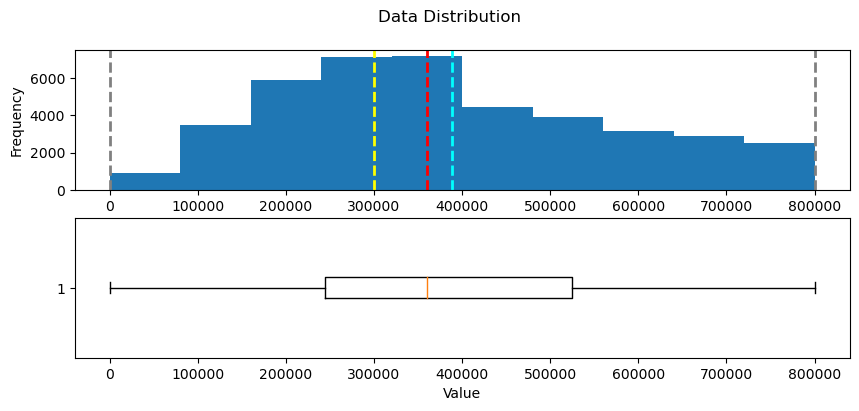

In [11]:
# remove households with pirce >= $800,000
df1 = df1[df1['price'] < 800000]
print(len(df1))
print(ShowDistributionFuc(df1['price']))
df1.head(1)

39064
Min: 1.0
Mean: 3.17829715338931
Median: 3.0
Mode: 3.0
Max: 5.0
None


C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,price,bed,bath,acre_lot,house_size,status,state,full_address
0,105000.0,3.0,2.0,0.12,920.0,for_sale,Puerto Rico,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601"


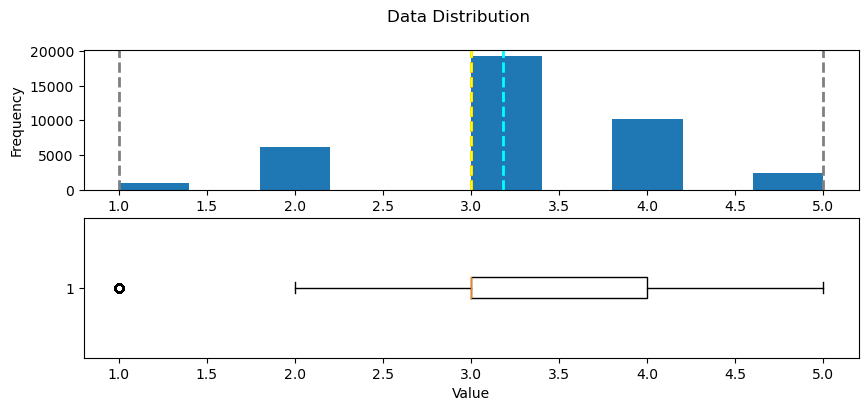

In [12]:
# remove households with bed >= 6
df1 = df1[df1['bed'] < 6]
print(len(df1))
print(ShowDistributionFuc(df1['bed']))
df1.head(1)

38712
Min: 1.0
Mean: 2.150082661706964
Median: 2.0
Mode: 2.0
Max: 4.0
None


C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,price,bed,bath,acre_lot,house_size,status,state,full_address
0,105000.0,3.0,2.0,0.12,920.0,for_sale,Puerto Rico,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601"


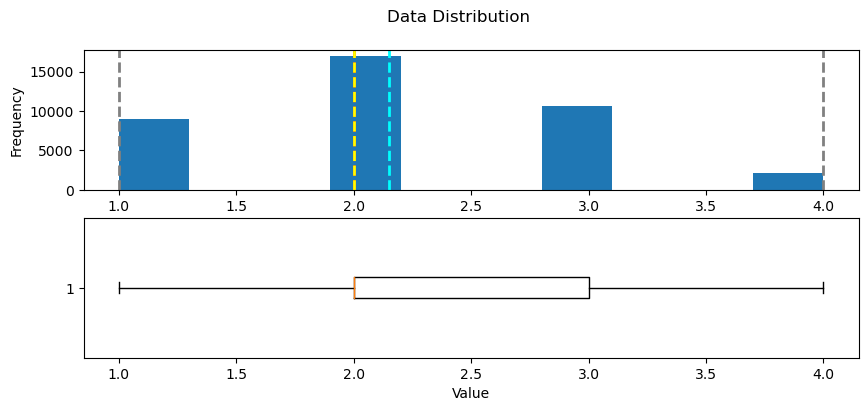

In [13]:
# remove households with bath >= 5
df1 = df1[df1['bath'] < 5]
print(len(df1))
print(ShowDistributionFuc(df1['bath']))
df1.head(1)

27950
Min: 0.0
Mean: 0.16709695885511777
Median: 0.14
Mode: 0.02
Max: 0.49
None


C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,price,bed,bath,acre_lot,house_size,status,state,full_address
0,105000.0,3.0,2.0,0.12,920.0,for_sale,Puerto Rico,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601"


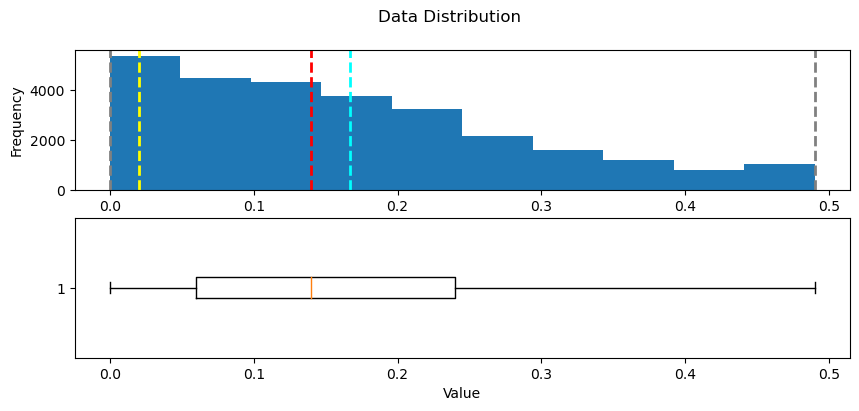

In [14]:
# remove households with acre_lot >= 0.5
df1 = df1[df1['acre_lot'] < 0.5]
print(len(df1))
print(ShowDistributionFuc(df1['acre_lot']))
df1.head(1)

27449
Min: 122.0
Mean: 1569.9525665780175
Median: 1469.0
Mode: 1200.0
Max: 3499.0
None


C:\Users\ryjam\AppData\Local\Temp\ipykernel_8368\1571036403.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,price,bed,bath,acre_lot,house_size,status,state,full_address
0,105000.0,3.0,2.0,0.12,920.0,for_sale,Puerto Rico,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601"


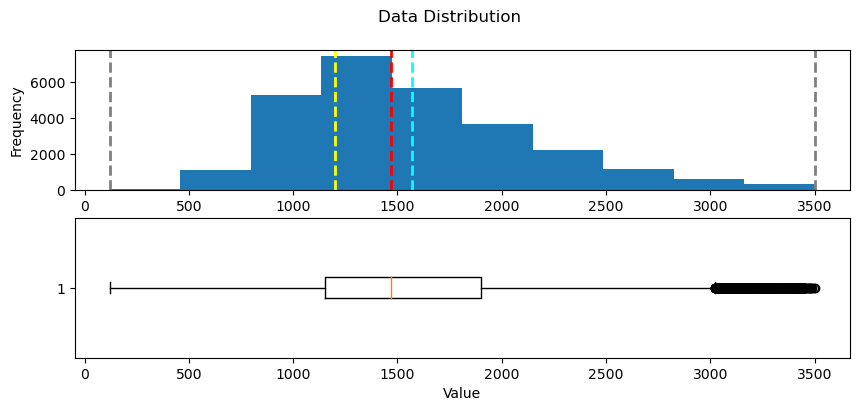

In [15]:
# remove households with house_size >= 3500
df1 = df1[df1['house_size'] < 3500]
print(len(df1))
print(ShowDistributionFuc(df1['house_size']))
df1.head(1)

In [16]:
# create new dataframe, used for one-hot encoding and X & Y training
# drop full_address
# One-Hot encode the status & state values
df1_ohe = df1.copy()
df1_ohe = df1_ohe.drop(['full_address'], axis=1) # drop full_address
df1_ohe = pd.get_dummies(df1_ohe, columns=["status"], drop_first=False)
df1_ohe = pd.get_dummies(df1_ohe, columns=["state"], drop_first=False)
df1_ohe.head()

,price,bed,bath,acre_lot,house_size,status_for_sale,state_Connecticut,state_Delaware,state_Maine,state_Massachusetts,state_New Hampshire,state_New Jersey,state_New York,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_Vermont,state_Virgin Islands,state_West Virginia,state_Wyoming
0,105000.0,3.0,2.0,0.12,920.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,80000.0,4.0,2.0,0.08,1527.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,67000.0,2.0,1.0,0.15,748.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,145000.0,4.0,2.0,0.10,1800.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,179000.0,4.0,3.0,0.46,2520.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Train & Fit a Regression Model

In [17]:
from sklearn.model_selection import train_test_split
# use price as the label

X, y = df1_ohe[df1_ohe.columns[1:-1]].values, df1_ohe[df1_ohe.columns[0]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 19214, rows
Test Set: 8235 rows


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

MSE: 18123471162.27958
RMSE: 134623.4420978738
R2: 0.4535119345415034


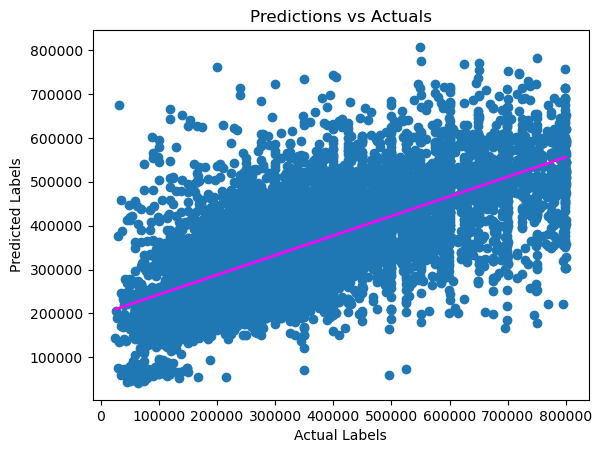

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model
- Save your trained model
- Use it to predict the price of a home with dummy data

In [20]:
import joblib

filename = './home_price_model.pkl'
joblib.dump(model, filename)

['./home_price_model.pkl']

In [21]:
# dummy data
# An array of features for each transaction
X_new = np.array([[3, 2, 0.12, 920, 1, 0, 0, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0]])

In [22]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
134990.49


## Convert street address to lat & long for r shiny mapping.
- Use a smaller data set for ease of use (use NJ).
- Already Done.  Time to process due to the limitation is roughly 4 hours.

In [23]:
# df1.groupby(['state'])['state'].count()

In [24]:
# df1_NJ = df1.copy()
# df1_NJ = df1_NJ[df1_NJ['state'] == 'New Jersey'].reset_index(drop=True)
# print(len(df1_NJ))
# df1_NJ.head(1)

In [25]:
# %%time

# # Have to incdlue a rate limitier to use Nominatim service on large datasets.
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="myPracApp")

# from geopy.extra.rate_limiter import RateLimiter
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# df1_NJ['location'] = df1_NJ['full_address'].apply(geocode)
# df1_NJ['point'] = df1_NJ['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# df1_NJ.head()

In [26]:
# df1_NJ = df1_NJ.dropna(subset=['point'])
# df1_NJ['point'] =df1_NJdfnj['point'].str.replace('(','').str.replace(')','').str.split(',').tolist()
# df1_NJ['latitude'] = df1_NJ['point'].str[0]
# df1_NJ['longitude'] = df1_NJ['point'].str[1]
# df1_NJ['latitude'] = df1_NJ['latitude'].astype(float)
# df1_NJ['longitude'] = df1_NJ['longitude'].astype(float)
# df1_NJ = df1_NJ.drop(['point'], axis=1)
# df1_NJ['index'] = dfnj.index
# df1_NJ.to_excel("data/NJLocationData.xlsx", index=False)
# print(len(df1_NJ))
# df1_NJ.head(1)